In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# DATASET
The dataset below has been explained in earlier notebooks and is being used here to carry on the data. 

In [2]:
contraceptive_data = pd.read_csv("contraceptive_method_dataset.csv", 
                                 encoding = "ISO-8859-1", engine='python')
X = contraceptive_data.drop('children', axis=1).copy()
contraceptive_data['predictor_population']= pd.cut(contraceptive_data['children'],
                                       [-1,2,16], labels=[0,1])
contraceptive_data['predictor_population_i']= contraceptive_data['predictor_population'].astype(int)
y= contraceptive_data['predictor_population_i']

# Splitting of the Training and Testing Data
Training mean and std calculated when the X train was fitted into the std scaler. 
For the X train scaled, the training mean and std was used only. 
While for the X test scaled, the test data was transformed.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 24, stratify = y )
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled  = std_scaler.transform(X_test)

# Decision Tree


In [4]:
#Import Decision Tree and instantiate
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
dt_clf_score = dt_clf.score(X_train, y_train)
print('Decision Tree Score with X_train and y_train: ', dt_clf_score)

Decision Tree Score with X_train and y_train:  0.9815712900096993


In [5]:
dt_clf.score(X_test, y_test)

0.669683257918552

_Note_
- The decision tree train score (98.15%) is higher than the test score (65.61%).

## Preliminary Classification of a Decision Tree

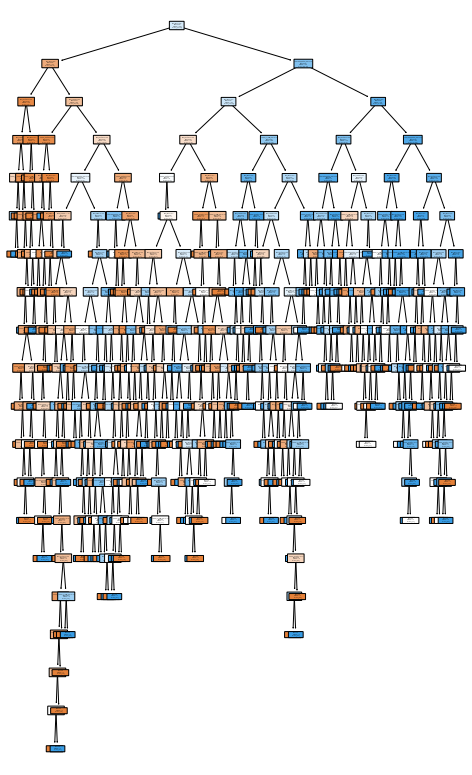

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Plot the tree
plt.figure(figsize = (8, 14))
plot_tree(dt_clf, filled = True, rounded=True,
          class_names = ["No Population Increase", "Population Increase"], feature_names= X.columns);

## Plotting of the Confusion Matrix

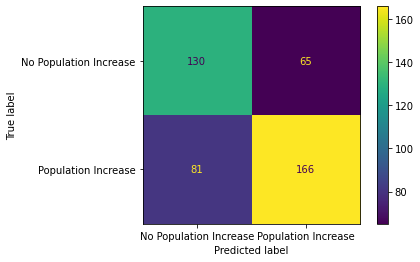

In [7]:
#Import confusion matric and plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, 
                      display_labels=["No Population Increase", "Population Increase"])

_Notes_
- Of the No Population Increase 195 which is 128 + 67, 128 (65.65%) is correctly classified. While for the Population Increase 247 (74 + 173), 173 (70.04%) is correctly classified.

## Cross Validation Score Plot

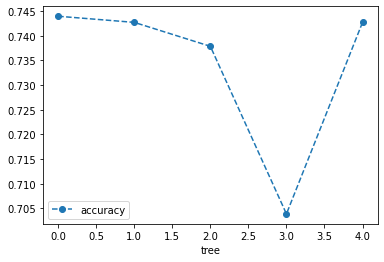

In [8]:
#Import Cross Validation Score
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state= 42, ccp_alpha=0.002)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

## Cross Validation in 5 Split


In [9]:
from sklearn.model_selection import cross_validate
cv_fivefold = cross_validate(estimator= dt_clf, 
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [10]:
cv_fivefold['test_score']

array([0.74396135, 0.74271845, 0.73786408, 0.7038835 , 0.74271845])

In [11]:
cv_fivefold['train_score']

array([0.82402913, 0.81333333, 0.83636364, 0.84484848, 0.8169697 ])

In [12]:
## fit best regularization logreg and plot the confusion matrix
validation = cv_fivefold['test_score']
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Decision Tree Log Regression 5-fold cv results (Accuracy) %.3f +/- %.3f'%(validation_mean, validation_std))

Decision Tree Log Regression 5-fold cv results (Accuracy) 0.734 +/- 0.015


_Note_
- Decision Tree Log Regression 5-fold cv results (Accuracy)  0.734 +/- 0.015

In [13]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha= cv_fivefold)
clf_dt_pruned = dt_clf.fit(X_train, y_train)

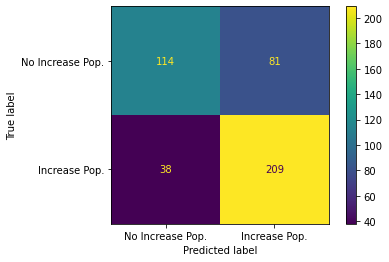

In [14]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, 
                      display_labels=["No Increase Pop.", "Increase Pop."])

_Notes_
- Of the No Population Increase 195 which is 114 + 81, 114 (58.46%) is correctly classified. While for the Population Increase 247 (38 + 209), 209 (84.61%) is correctly classified.

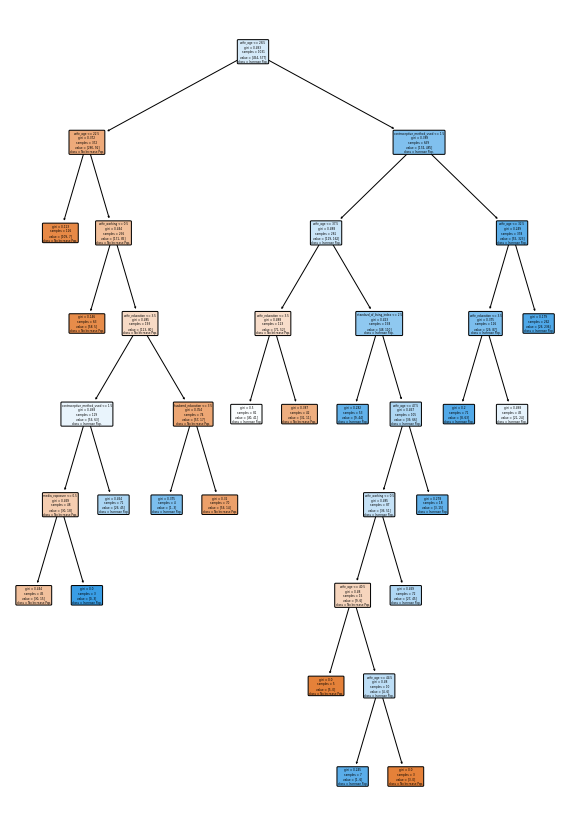

In [15]:
plt.figure(figsize = (10, 15))
plot_tree(clf_dt_pruned, filled = True, rounded=True,
          class_names = ["No Increase Pop.", "Increase Pop."], feature_names= X.columns);